## Computing the pitch of a speech frame with the autocorrelation method ##

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.io import wavfile
from scipy.signal import correlate, lfilter, butter
from numpy.fft import fft, ifft
from scipy.signal import correlate, lfilter, medfilt, butter
rcParams['figure.figsize'] = (15, 10)
rcParams['axes.titlesize'] = (25)
rcParams['axes.labelsize'] = (20)

Text(0.5,1,'sb034.wav')

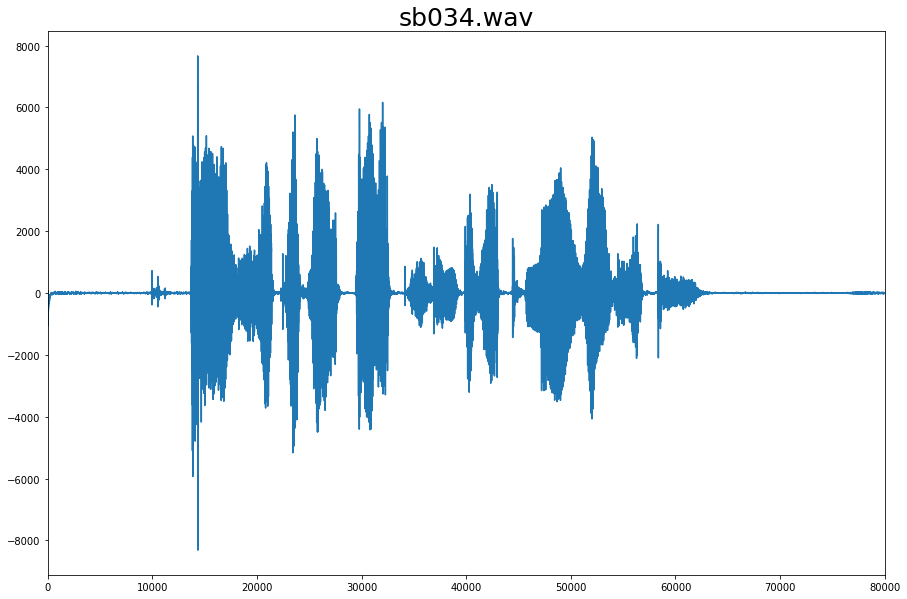

In [3]:
# Read and plot a speech file from the FDA_UE database
name = "sb034.wav"
filename="../input/fda_ue/" + name
sfreq, data = wavfile.read(filename)
#a = medfilt(abs(data),kernel_size = 33)
plot(data)
xlim(0, len(data))
#ylim(0, 4000)
title(name)

In [4]:
def noise_cancelling(frame):
    n = 10 # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    frame = lfilter(b,a,frame)
    return frame

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


Text(0.5,1,'A frame')

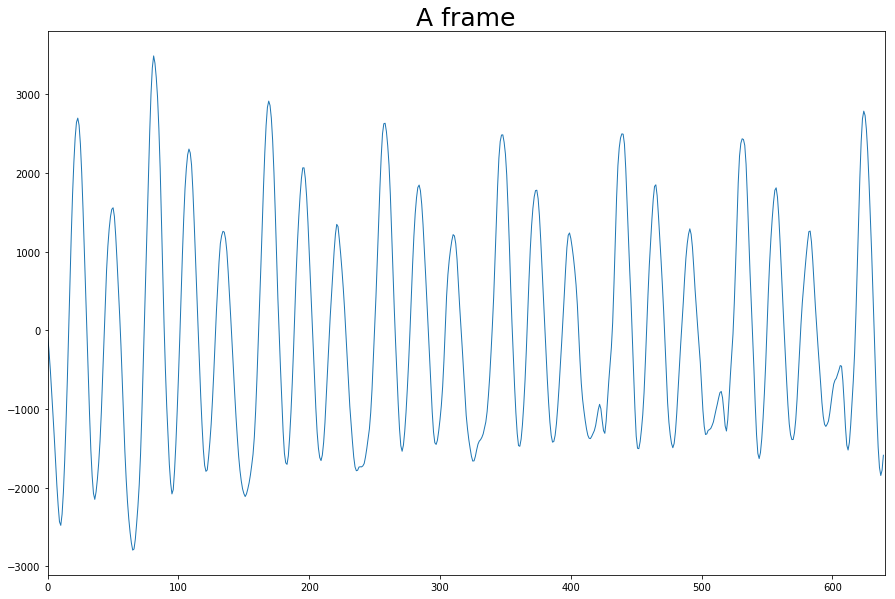

In [5]:

# Pick a short segment

windowlength = 32 # 32ms
ns_windowlength = int(round((windowlength * sfreq) / 1000))
pos = 31000
frame_length = ns_windowlength

frame = data[pos:pos+frame_length]
frame = noise_cancelling(frame)
plot(frame, linewidth=1.0)
xlim(0, frame_length)
title("A frame")
#medfilt(abs(frame),kernel_size = 21).mean() 


**Cepstrum**

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


Text(0,0.5,'Normalized Aplitude')

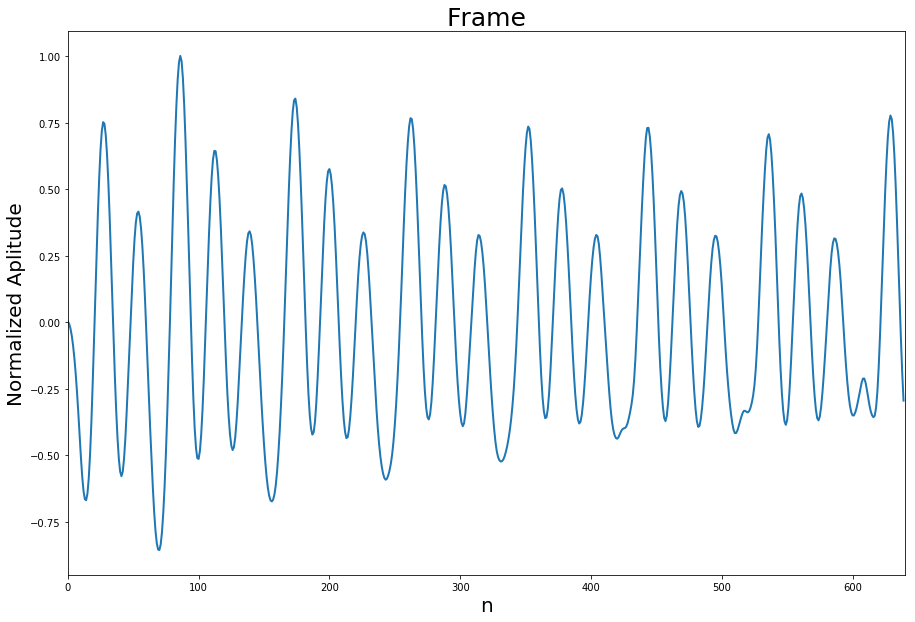

In [6]:
   
    #lowpass filter?
windowed = noise_cancelling(frame)
windowed = windowed.astype(np.float)
windowed -= windowed.mean()

amax = np.abs(windowed).max()
if amax > 0:
     windowed /= amax
else:
     0
    
plot(windowed, linewidth=2.0)
xlim(0, frame_length)
title("Frame")
xlabel("n")
ylabel("Normalized Aplitude")

Text(0,0.5,'FT(s)')

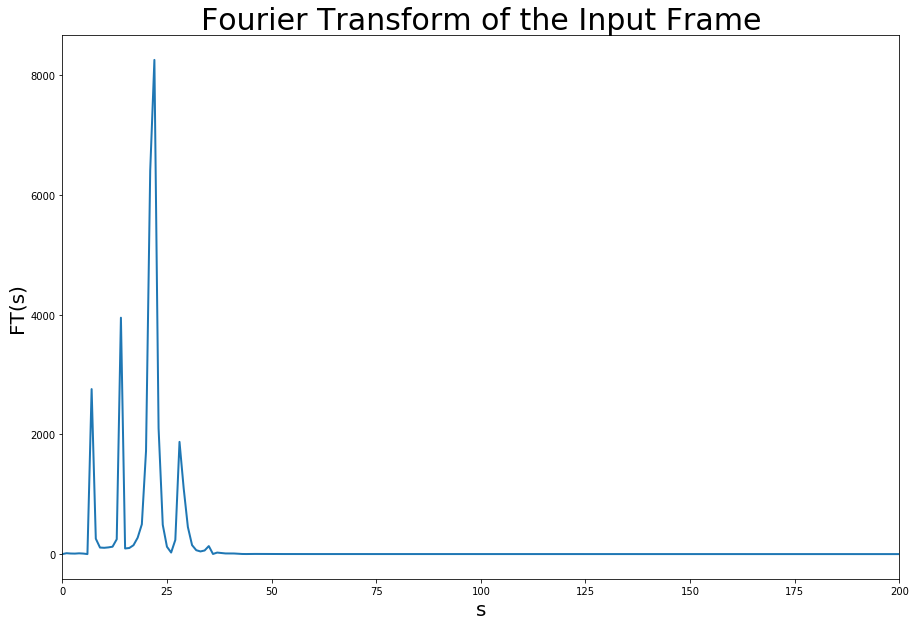

In [7]:
spectrum = abs(np.fft.fft((windowed)))**2
spectrum[spectrum == 0] = 0 #10**-10

plot(spectrum, linewidth=2.0)
xlim(0, 200)
title("Fourier Transform of the Input Frame",fontsize=30)
xlabel("s")
ylabel("FT(s)")



Text(0,0.5,'log(FT(s))')

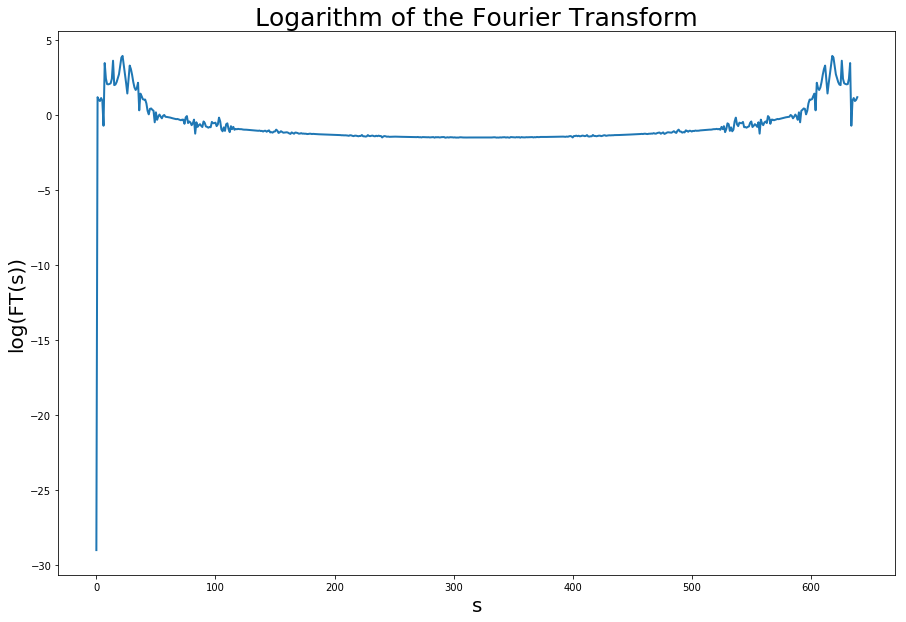

In [8]:
log_spectrum = np.log10(spectrum)


#log_spectrum = log_spectrum[len(log_spectrum)//2:]
#np.fft.ifft(np.log(powerspectrum))

plot(log_spectrum, linewidth=2.0)
#xlim(0, 200)
title("Logarithm of the Fourier Transform")
xlabel("s")
ylabel("log(FT(s))")

Text(0,0.5,'IFT(log(FT))')

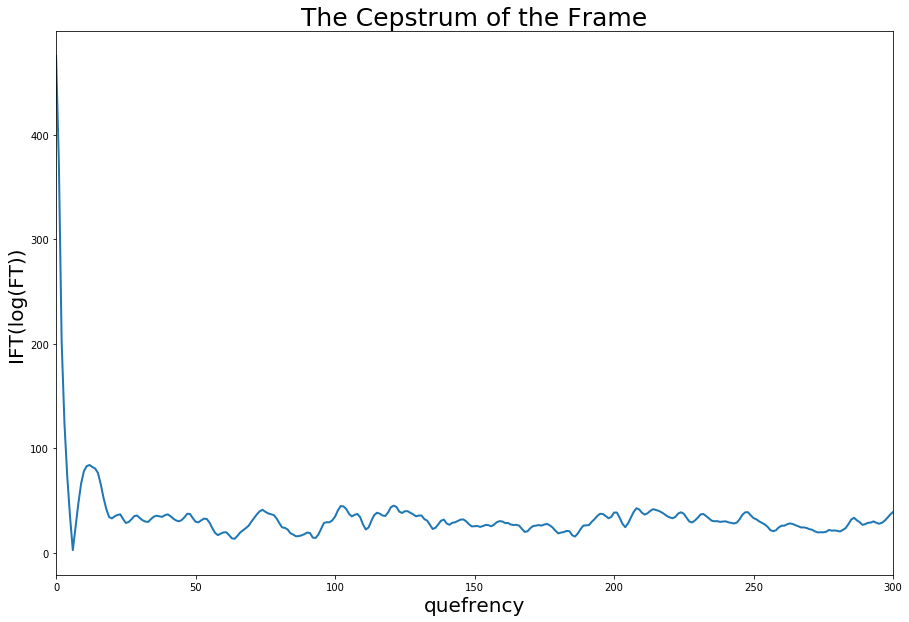

In [9]:
cepst = abs(np.fft.fft(log_spectrum))
plot(cepst, linewidth=2.0)
xlim(0, 300)
title("The Cepstrum of the Frame")
xlabel("quefrency")
ylabel("IFT(log(FT))")

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


Text(0.5,1,'A frame')

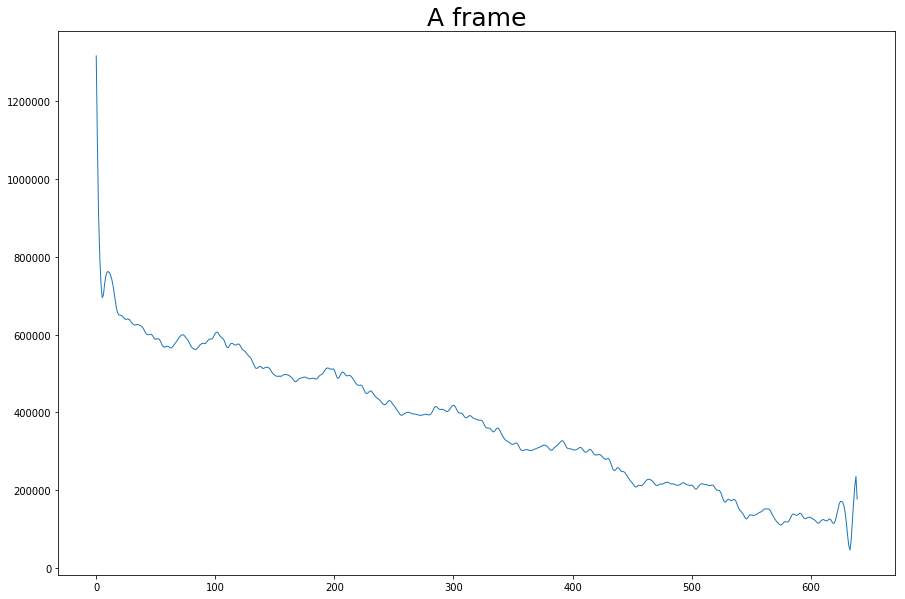

In [10]:

corr = correlate(cepst, cepst) 
    
# keep the positive part of the frequency range
corr = corr[len(corr)//2:]

plot(corr, linewidth=1.0)
#xlim(0, frame_length)
title("A frame")
   

In [11]:

    #definition of the observation window
Fmin=50
Fmax=700

minimum =int(sfreq/Fmax)
maximum =int(sfreq/Fmin)

peak = np.argmax(corr[minimum:maximum]) + minimum
    
f0= sfreq / peak

if  f0 > 50 and f0 < 400:
    print("f0")
else:
    print(0)      

0


### Caculate the first difference using [numpy.diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) ###

### Find the index of the first sample with positive difference using [numpy.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) ###

### Find the index of the sample with the maximum value using [numpy.argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) ###